In [1]:
from tools.DataLoader import DataLoader
from tools.EDA import EDA
from tools.DataPreprocessor import DataPreprocessor
from tools.ModelPipeline import ModelPipeline
from tools.FeatureEngineeringTool import FeatureEngineeringTool

from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import StandardScaler

In [2]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(
    request_type="local", path="db/mod_05_topic_10_various_data.pkl"
)
df_dict = data_loader.load_data()
df = df_dict["concrete"]

In [3]:
# Step 2: Perform EDA using the EDA class
eda = EDA(df)

# Perform EDA using the EDA class
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

,Column,Has_Nulls,Dtype
Cement,Cement,False,float64
BlastFurnaceSlag,BlastFurnaceSlag,False,float64
FlyAsh,FlyAsh,False,float64
Water,Water,False,float64
Superplasticizer,Superplasticizer,False,float64
CoarseAggregate,CoarseAggregate,False,float64
FineAggregate,FineAggregate,False,float64
Age,Age,False,int64
CompressiveStrength,CompressiveStrength,False,float64



Dataset Shape:

(1030, 9)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CompressiveStrength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6



Missing Values:



Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64


Sample Data:



,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
fet = FeatureEngineeringTool(df)

fet.add_count_feature(
    [
        "Cement",
        "BlastFurnaceSlag",
        "FlyAsh",
        "Water",
        "Superplasticizer",
        "CoarseAggregate",
        "FineAggregate",
    ]
)


df = fet.df

Added new feature 'Count' with counts of non-zero materials.


In [5]:
display(df)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,Count
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,5
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,7
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,6
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,7
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,6


In [6]:
# Initialize DataPreprocessor
preprocessor = DataPreprocessor(df)

In [7]:

numeric_transformers = [
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
]
categorical_transformers = [
]

In [8]:
# Create pipeline
preprocessor.create_pipeline(
    numeric_transformers, categorical_transformers
)

# Fit and transform train data
df_transformed = preprocessor.fit_transform(df)

TypeError: 'NoneType' object is not iterable

In [ ]:
# Visualize pipeline
preprocessor.visualize_pipeline()

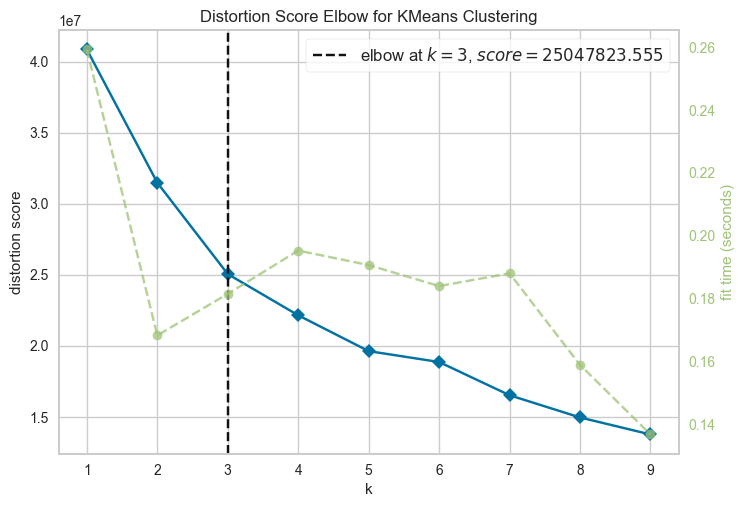

In [ ]:
eda.determine_optimal_clusters(df, k_range=(1, 10))